In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/My Drive/Colab Notebooks/For git

/content/drive/My Drive/Colab Notebooks/For git


In [3]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/For git/')

In [4]:
from all_methods import *

Using TensorFlow backend.


###Подготовка первых признаковых описаний

In [5]:
way = '/content/drive/My Drive/Colab Notebooks/First_features/'
update_way(way)

In [6]:
# если использовать это, то следующую ячейку выполнять не надо
objects = np.load(way + 'objects__tr=50_smpl=100.npy')
features1 = np.load(way + 'features1__tr=50_smpl=100.npy')
X = (features1 - np.mean(features1, axis = 0)) / np.std(features1, axis = 0)

Количество элементов по трассам 315, по дискретам 4, всего 1260

Количество элементов по трассам 1000, по дискретам 2, всего 2000

Количество элементов по трассам 1000, по дискретам 3, всего 3000

Количество элементов по трассам 50, по дискретам 4, всего 200

Количество элементов по трассам 50, по дискретам 4, всего 200

Количество элементов по трассам 50, по дискретам 4, всего 200

Количество элементов по трассам 50, по дискретам 4, всего 200

Количество элементов по трассам 50, по дискретам 4, всего 200

Количество элементов по трассам 50, по дискретам 4, всего 200

Количество элементов по трассам 50, по дискретам 4, всего 200

Количество элементов по трассам 1000, по дискретам 6, всего 6000

Количество элементов по трассам 50, по дискретам 5, всего 250

Количество элементов по трассам 50, по дискретам 5, всего 250

Количество элементов по трассам 50, по дискретам 5, всего 250

Количество элементов по трассам 50, по дискретам 5, всего 250

Количество элементов по трассам 242, по диск

100%|██████████| 17079/17079 [02:08<00:00, 133.16it/s]


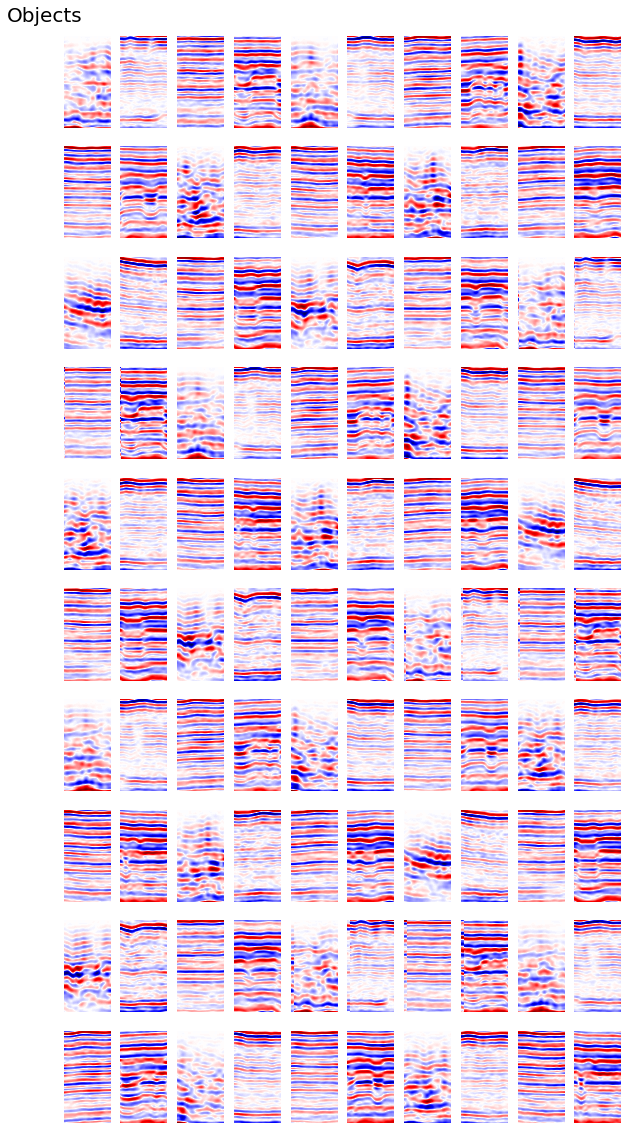

In [ ]:
ampField = np.load("ampField.npy", allow_pickle=True)
objects = create_objects('objects', ampField, num_traces=50, num_samples=100)
features1 = create_features1('features1', objects)
X = (features1 - np.mean(features1, axis = 0)) / np.std(features1, axis = 0)
visualize_objects(objects[:100])

###Эффективная размерность

In [ ]:
way = '/content/drive/My Drive/Colab Notebooks/First_features/PCA/'
update_way(way)

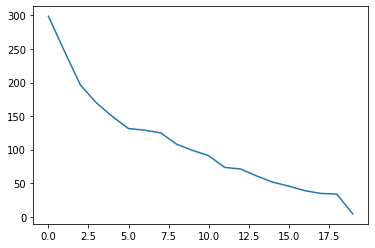

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X)
plt.plot(np.arange(pca.singular_values_.shape[0]), pca.singular_values_)

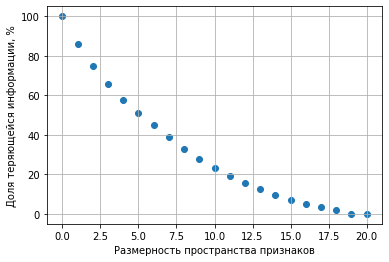

In [ ]:
all_lambda_sum = np.sum(pca.singular_values_)
E = []
for i in range(pca.singular_values_.shape[0], -1, -1):
  E.append(1 - np.sum(pca.singular_values_[:i]) / all_lambda_sum)

plt.scatter(np.arange(pca.singular_values_.shape[0] + 1), np.array(E[::-1])*100)
plt.xlabel("Размерность пространства признаков")
plt.ylabel("Доля теряющейся информации, %")
plt.grid()
plt.show()

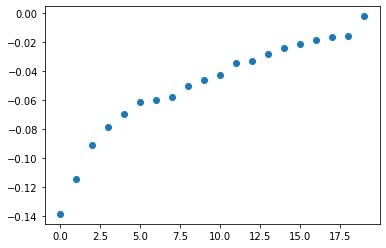

In [ ]:
plt.scatter(np.arange(pca.singular_values_.shape[0]), np.diff(np.array(E[::-1])))

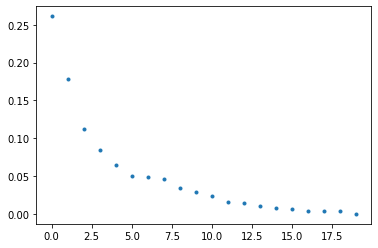

In [ ]:
plt.scatter(np.arange(pca.explained_variance_ratio_.shape[0]), pca.explained_variance_ratio_, marker='.')

###Кластеризация после pca до 10

In [7]:
way = '/content/drive/My Drive/Colab Notebooks/First_features/PCA/'
update_way(way)

In [8]:
X_pca10 = reduce_pca('X_pca10', X, 10)

In [9]:
# если использовать это, то следующую ячейку выполнять не надо
X_pca10_optics = pickle.load(open(way + 'X_pca10_optics__min_samples=30_xi=0.005_min_cluster_size=50.pkl', 'rb'))

In [ ]:
X_pca10_optics = clust_optics('X_pca10_optics', X_pca10, min_samples=30, xi=0.005, min_cluster_size=50)

In [10]:
np.unique(X_pca10_optics.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

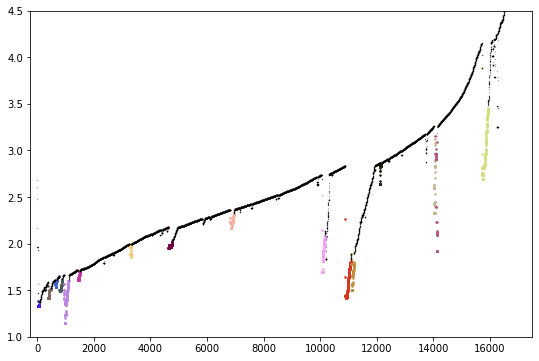

In [11]:
reachability_plot(X_pca10_optics, limx=[-250,17500],limy=[1,4.5])

In [12]:
visualize_clusters(objects, X_pca10_optics.labels_)

Output hidden; open in https://colab.research.google.com to view.

####Двумерная визуализация кластеризации в 10-мерном пространстве признаков

In [ ]:
X_pca2 = reduce_pca('X_pca2', X, 2)

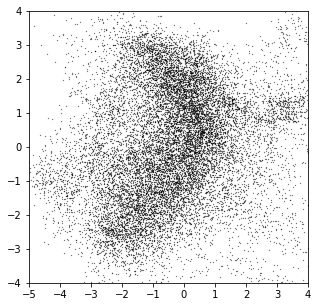

In [ ]:
draw_samples_2D(X_pca2, limx=[-5,4], limy=[-4,4])

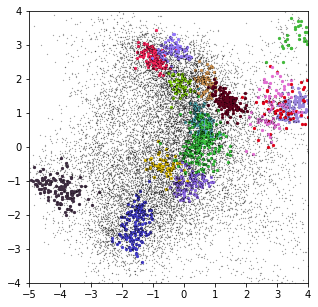

In [ ]:
draw_clusters_2D(X_pca2, X_pca10_optics.labels_, limx=[-5,4], limy=[-4,4])

####Масштабирование после понижения размерности **влияет** на кластеризацию:

In [13]:
X_pca10_scaled = (X_pca10 - np.mean(X_pca10, axis=0)) / np.std(X_pca10, axis = 0)

In [14]:
# если использовать это, то следующую ячейку выполнять не надо
X_pca10_scaled_optics = pickle.load(open(way + 'X_pca10_scaled_optics__min_samples=30_xi=0.005_min_cluster_size=50.pkl', 'rb'))

In [ ]:
# взял те же параметры, что и для немасштабированных данных
X_pca10_scaled_optics = clust_optics('X_pca10_scaled_optics', X_pca10_scaled, min_samples=30, xi=0.005, min_cluster_size=50)

In [15]:
np.unique(X_pca10_scaled_optics.labels_) # меньше кластеров и меньше объектов попало в кластеры, чем в случае без масштабирования после понижения

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9])

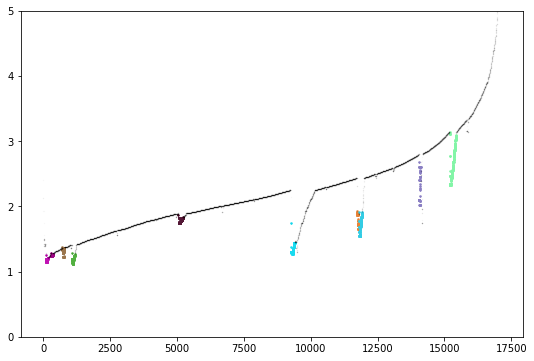

In [ ]:
reachability_plot(X_pca10_scaled_optics, limy=[0,5])

In [ ]:
visualize_clusters(objects, X_pca10_scaled_optics.labels_)

####Двумерная визуализация кластеризации в 2-мерном пространстве признаков

In [21]:
# если использовать это, то следующую ячейку выполнять не надо
X_pca2_optics = pickle.load(open(way + 'X_pca2_optics__min_samples=30_xi=0.005_min_cluster_size=50.pkl', 'rb'))

In [ ]:
X_pca2_optics = clust_optics('X_pca2_optics', X_pca2, min_samples=30, xi=0.005, min_cluster_size=50)

In [22]:
np.unique(X_pca2_optics.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55])

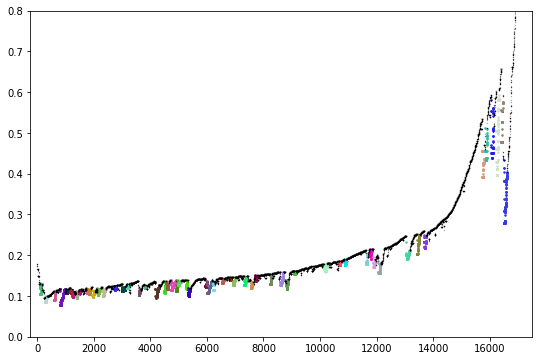

In [23]:
reachability_plot(X_pca2_optics, limx=[-250,17500], limy=[0,0.8])

In [ ]:
visualize_clusters(objects, X_pca2_optics.labels_) # хоть кластеры выделены, но в них часто непохожие объекты (разрезы)

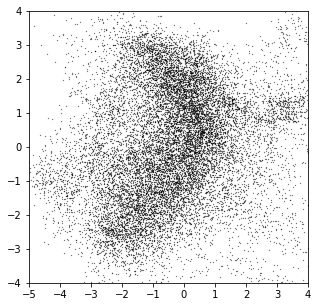

In [ ]:
draw_samples_2D(X_pca2, limx=[-5,4], limy=[-4,4])

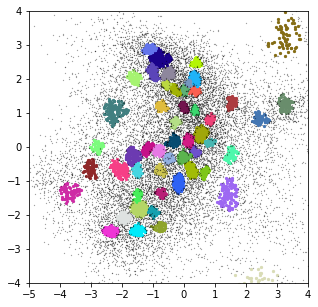

In [ ]:
draw_clusters_2D(X_pca2, X_pca2_optics.labels_, limx=[-5,4], limy=[-4,4])